# healpy functions

In [1]:
import healpy as hp
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
from pylab import rcParams

## NSIDE and NPIX

In [2]:
NSIDE=256
NPIX = 12 * NSIDE*NSIDE
print(NPIX)
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

786432
786432


## NSIDE vs actual size

In [3]:
area_str = 4 * np.pi / NPIX
area_arcdeg2 = area_str /((np.pi/180)**2.0)
print("1ピクセルの面積 : %.2e str = %.2e arcdeg2" % (area_str, area_arcdeg2))
len_arcmin = np.sqrt(area_arcdeg2)*60.
print("1ピクセルの長さ : %.2f arcmin" % (len_arcmin))
#
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

1ピクセルの面積 : 1.60e-05 str = 5.25e-02 arcdeg2
1ピクセルの長さ : 13.74 arcmin
Approximate resolution at NSIDE 256 is 0.23 deg


i, NSIDE, NPIX, area_str, area_arcdeg2, len_arcmin
 0     1           12 1.05e+00 3.44e+03 3517.9
 1     2           48 2.62e-01 8.59e+02 1759.0
 2     4          192 6.54e-02 2.15e+02  879.5
 3     8          768 1.64e-02 5.37e+01  439.7
 4    16         3072 4.09e-03 1.34e+01  219.9
 5    32        12288 1.02e-03 3.36e+00  109.9
 6    64        49152 2.56e-04 8.39e-01   55.0
 7   128       196608 6.39e-05 2.10e-01   27.5
 8   256       786432 1.60e-05 5.25e-02   13.7
 9   512      3145728 3.99e-06 1.31e-02    6.9
10  1024     12582912 9.99e-07 3.28e-03    3.4
11  2048     50331648 2.50e-07 8.20e-04    1.7
12  4096    201326592 6.24e-08 2.05e-04    0.9
13  8192    805306368 1.56e-08 5.12e-05    0.4
14 16384   3221225472 3.90e-09 1.28e-05    0.2


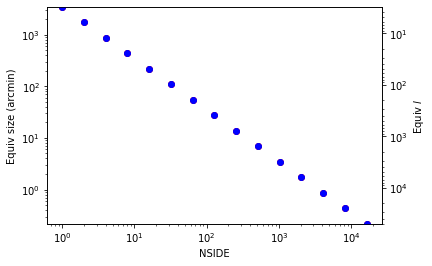

In [4]:
# Plot size vs NSIDE 
Is=[]
nsides=[]
len_arcmins=[]
Ls=[]
print("i, NSIDE, NPIX, area_str, area_arcdeg2, len_arcmin")
for i in range(0,15):
    NSIDE = 2**i
    NPIX = 12 * NSIDE*NSIDE
    area_str = 4 * np.pi / NPIX
    area_arcdeg2 = area_str /((np.pi/180)**2.0)
    len_arcmin = np.sqrt(area_arcdeg2)*60.
    l=180.0*60.0/len_arcmin
    print("%2d %5d %12d %.2e %.2e %6.1f" % (i, NSIDE, NPIX, area_str, area_arcdeg2, len_arcmin))
    Is.append(i)
    nsides.append(NSIDE)
    len_arcmins.append(len_arcmin)
    Ls.append(l)

#rcParams['figure.figsize'] = 10,5
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_ylim([np.min(len_arcmins),np.max(len_arcmins)])
ax2.set_ylim([np.max(Ls),np.min(Ls)])

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('NSIDE')
ax1.set_ylabel('Equiv size (arcmin)')
ax2.set_ylabel('Equiv $l$')
ax1.scatter(nsides, len_arcmins, color='red')
ax2.scatter(nsides, Ls, color='blue')
plt.show()
fig.savefig('CR_NSIDE.pdf', bbox_inches='tight')

## Cells on map

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


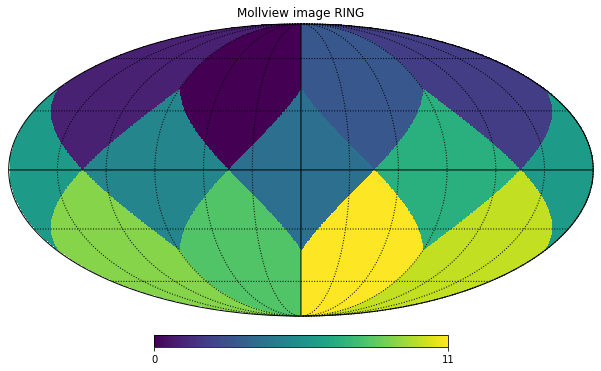

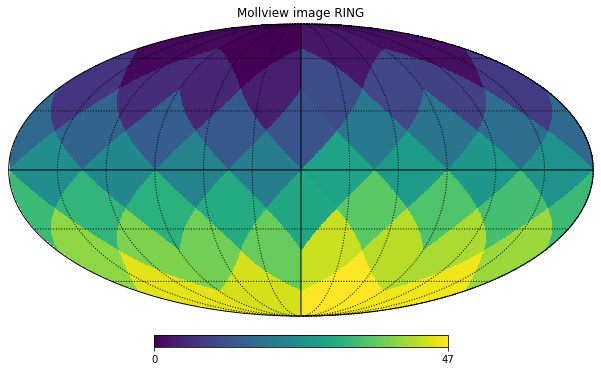

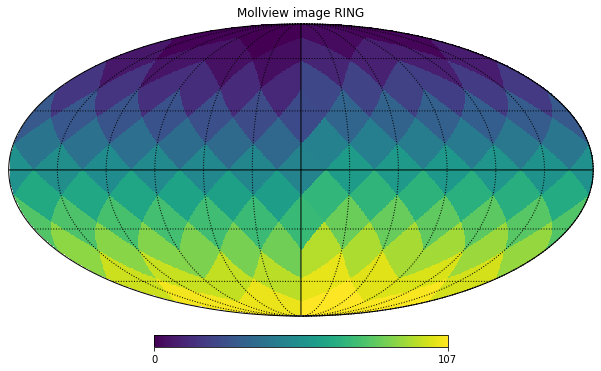

In [5]:
for NSIDE in np.linspace(1,3,3):
    NPIX = hp.nside2npix(NSIDE)
    m = np.arange(NPIX)
    hp.mollview(m, title="Mollview image RING")
    hp.graticule()

## Get the orientation from the healpix number.

In [6]:
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))
print(theta, phi)

[1.46197116 1.46197116 1.46197116 1.46197116 2.92418036] [ 45.  135.  225.  315.   22.5]


## View WMAP map

URL transformed to HTTPS due to an HSTS policy
--2020-10-04 08:41:46--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov) をDNSに問いあわせています... 129.164.179.68
lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 100676160 (96M)
`wmap_band_iqumap_r9_7yr_W_v4.fits' に保存中

wmap_band_iqumap_r9 100%[===================>]  96.01M   370KB/s    in 5m 13s  

2020-10-04 08:47:00 (314 KB/s) - `wmap_band_iqumap_r9_7yr_W_v4.fits' へ保存完了 [100676160/100676160]

URL transformed to HTTPS due to an HSTS policy
--2020-10-04 08:47:00--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_V_v4.fits
lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov) をDNSに問いあわせています... 129.164.179.68
lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 100676160 (96M)
`wmap_ban

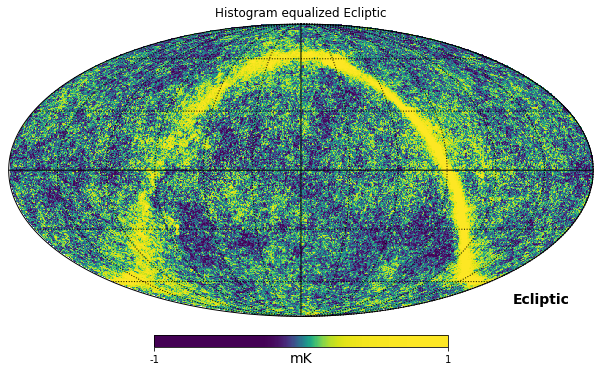

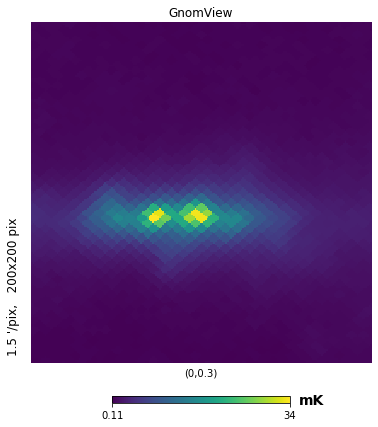

In [7]:
!healpy_get_wmap_maps.sh
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()
hp.gnomview(wmap_map_I, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

In [8]:
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


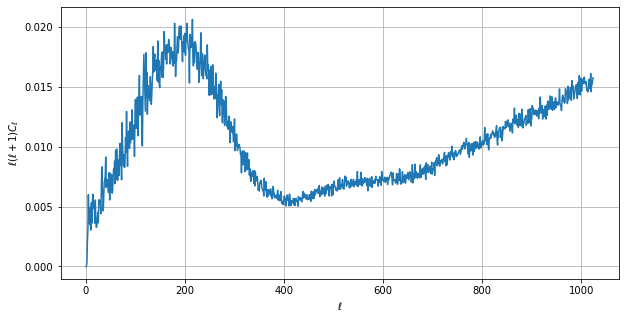

In [9]:
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)